In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
import re
import random
data=pd.read_csv('/Users/cananerdem/Desktop/MAAŞ__PROJE/Maas-Arastirmasi-Ekim-2024.csv')

In [3]:

data.columns
# Tüm sütunlardaki boşlukları temizlemek için kullanılır
data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
# datadaki eksik verileri bize gösteririr
print(data.isnull().sum().sort_values(ascending=False))
# "Temmuz & Ağustos dönemi zam oranınız nedir?" sütununu veri setinden kaldırıyoruz
data = data.drop(columns=['Temmuz & Ağustos dönemi zam oranınız nedir?'], errors='ignore')

# Yeni sütun başlıklarını kontrol etmek için
print(data.columns)


Pozisyonunuzun Ismi?.1                                                    12
Timestamp                                                                  0
Cinsiyet                                                                   0
Şirketiniz hangi lokasyonda?                                               0
Tam zamanlı mı yarı zamanlı mı çalışıyorsunuz?                             0
Çalışma şekliniz nedir?                                                    0
Şirketinizin çalışan sayısı nedir?                                         0
Kaç yıllık deneyiminiz var?                                                0
Çalıştığınız Sektor? (Otomotiv, Bankacilik, Saglik vs)                     0
Pozisyonunuzun Ismi?                                                       0
Aylık Ortalama Net Maaşınız? (Turk Lirasi)                                 0
Yıllık ek net gelirleriniz? (prim bonus ve benzeri gelirlerin toplamı)     0
Yan haklarınız nelerdir?                                                   0

CİNSİYET-ÇALIŞMA ŞEKLİ

In [4]:
data[data.columns[1]].value_counts()


Cinsiyet
Kadın                    1371
Erkek                     198
Belirtmek Istemiyorum       4
Name: count, dtype: int64

In [5]:
data[data.columns[4]].value_counts()

Çalışma şekliniz nedir?
Ofiste     897
Hybrid     413
Uzaktan    263
Name: count, dtype: int64

In [6]:
# Cinsiyet ve Çalışma Durumu bazında oranları hesaplayın
cinsiyet_calismaduru = data.groupby(['Cinsiyet', 'Çalışma şekliniz nedir?']).size().unstack()

# Oranları hesaplayın (Çalışıyor ve Çalışmıyor oranları)
cinsiyet_calismaduru_percent = cinsiyet_calismaduru.div(cinsiyet_calismaduru.sum(axis=1), axis=0) * 100

print(cinsiyet_calismaduru_percent)


Çalışma şekliniz nedir?     Hybrid     Ofiste    Uzaktan
Cinsiyet                                                
Belirtmek Istemiyorum    25.000000  25.000000  50.000000
Erkek                    21.717172  60.101010  18.181818
Kadın                    26.914661  56.673961  16.411379


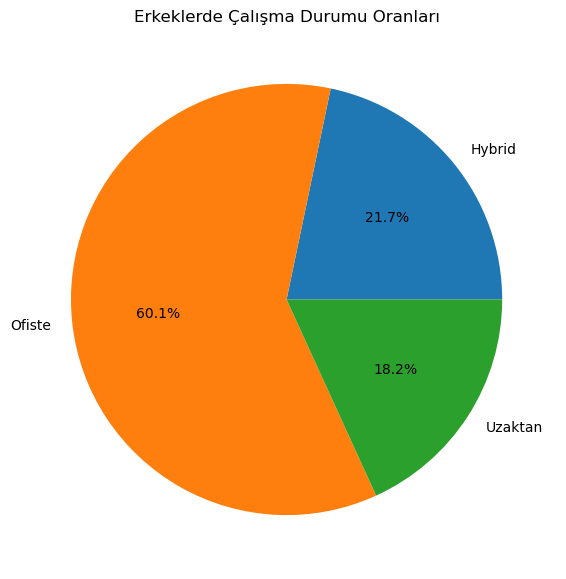

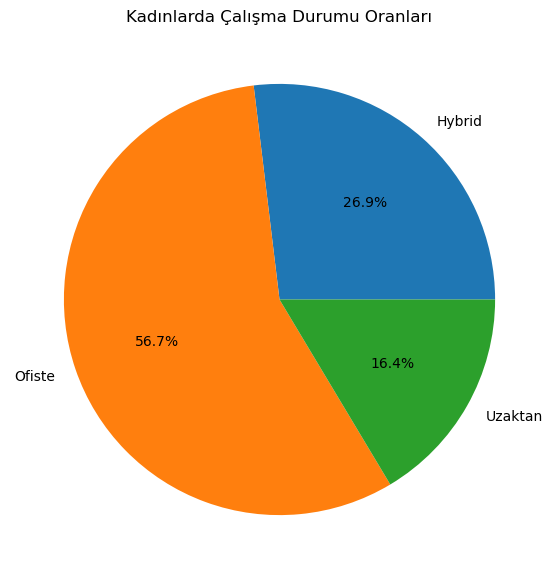

In [7]:

gender_group = data.groupby('Cinsiyet')['Çalışma şekliniz nedir?'].value_counts(normalize=True).unstack()

gender_group.loc['Erkek'].plot(kind='pie', autopct='%1.1f%%', figsize=(7, 7))
plt.title('Erkeklerde Çalışma Durumu Oranları')
plt.ylabel('')
plt.show()

gender_group.loc['Kadın'].plot(kind='pie', autopct='%1.1f%%', figsize=(7, 7))
plt.title('Kadınlarda Çalışma Durumu Oranları')
plt.ylabel('')
plt.show()


DENEYİM-AYLIK NET MAAŞ

In [8]:
data[data.columns[10]].value_counts()

Aylık Ortalama Net Maaşınız? (Turk Lirasi)
21.000-30.000 TL      455
31.000-40.000 TL      335
41.000-50.000 TL      242
10.000-20.000 TL      195
51.000-60.000 TL      143
61.000-70.000 TL       68
71.000-80.000 TL       53
81.000-90.000 TL       29
120.000 TL ve üstü     23
91.000-100.000 TL      16
101.000-120.000 TL     14
Name: count, dtype: int64

In [9]:
data[data.columns[6]].value_counts()

Kaç yıllık deneyiminiz var?
1-3 Yıl       560
0-1 Yıl       372
3-5 Yıl       295
5-7 Yıl       154
12 ve ustu     70
7-9 Yıl        69
9-12 Yıl       53
Name: count, dtype: int64

POZİSYONA GÖRE YILLIK EK GELİR ANALİZİ


In [11]:
data[data.columns[9]].value_counts()

Pozisyonunuzun Ismi?.1
Mimar                                              28
İş Analisti                                        24
Avukat                                             18
Müşteri Temsilcisi                                 15
Satış Danışmanı                                    13
                                                   ..
Ön Muhasebeci                                       1
Merchandiser Assistant                              1
Operations And Business Analysis Support Intern     1
Üretim Ve Sevkiyat Uzmanı                           1
Teaching Assistant                                  1
Name: count, Length: 1021, dtype: int64

In [12]:
data[data.columns[11]].value_counts()

Yıllık ek net gelirleriniz? (prim bonus ve benzeri gelirlerin toplamı)
Ek gelirim yok        1066
20.000-30.000 TL       154
31.000-50.000 TL        95
51.000-70.000 TL        61
150.000 TL ve üstü      61
71.000-90.000 TL        49
111.000-150.000 TL      43
91.000-110.000 TL       31
10.000-30.000 TL        13
Name: count, dtype: int64

In [13]:
gk = data.groupby(data.columns[9]).groups
print(gk)

{'Abap Yazılım Danışmanı': [956], 'Account Executive': [401, 490, 1503], 'Account Manager': [807, 967, 1140, 1249], 'Account Manager/ Sales Development Representative': [1056], 'Accounting Specialist': [224], 'Accounting Supervisor': [823], 'Acil Hekimi - Pratisyen Hekim': [463], 'Adaptasyon Uzmanı': [171], 'Aday Mühendis': [332], 'Analist': [516, 841, 844, 1434], 'Analiz Uzman Yardımcısı': [685, 1136], 'Analyst Consultant': [1169], 'Android Developer': [28, 1156], 'Antrenör': [166], 'Application Engineer': [682], 'Application Specialist': [44], 'Ar- Ge Analitik Uzman Yardımcısı': [1295], 'Ar-Ge Mühendisi': [1196], 'Ar-Ge Uzmanı': [350], 'Ar-Ge Ve Maliyet, Ruhsatlandırma': [240], 'Ar-Ge Yöneticisi': [871], 'Araştırma Görevlisi': [231, 261, 316, 630, 633, 856, 1412], 'Araştırmacı': [951], 'Arge Mühendisi': [629, 657, 791, 1097], 'Arge Uzman Yardımcısı': [352, 353], 'Arge Uzman Yardımcısı (Danışmanlık Firması)': [196], 'Arge Uzmanı': [608, 1205], 'Arge Şefi': [90], 'Art Director': [602, 

In [14]:
# 11. sütunun (12. sütun) benzersiz değerlerinin sayısını bulmak
unique_values_count = data.iloc[:, 9].nunique()

# Sonuç
print(f"9. sütundaki benzersiz değerlerin sayısı: {unique_values_count}")


9. sütundaki benzersiz değerlerin sayısı: 1021


In [15]:
gk_1 = data.groupby(data.columns[11]).groups
print(gk_1)

{'10.000-30.000 TL': [1, 3, 5, 7, 8, 10, 13, 14, 15, 16, 17, 18, 19], '111.000-150.000 TL': [11, 27, 77, 118, 153, 163, 210, 212, 259, 264, 266, 364, 367, 403, 441, 473, 492, 523, 537, 563, 585, 622, 642, 722, 822, 865, 932, 936, 979, 995, 1014, 1043, 1046, 1063, 1094, 1161, 1221, 1249, 1262, 1327, 1344, 1355, 1388], '150.000 TL ve üstü': [47, 82, 102, 159, 179, 253, 300, 301, 302, 310, 349, 386, 452, 478, 505, 509, 519, 531, 599, 614, 655, 677, 686, 690, 703, 704, 705, 738, 757, 776, 785, 792, 797, 862, 888, 903, 930, 954, 957, 971, 1032, 1068, 1079, 1085, 1101, 1144, 1181, 1208, 1209, 1214, 1220, 1224, 1279, 1329, 1337, 1362, 1400, 1432, 1470, 1472, 1507], '20.000-30.000 TL': [28, 40, 41, 45, 60, 61, 75, 79, 116, 117, 145, 157, 160, 174, 177, 195, 203, 217, 220, 244, 251, 265, 270, 285, 299, 308, 321, 326, 335, 341, 358, 363, 369, 370, 375, 377, 389, 394, 397, 398, 400, 406, 455, 459, 483, 486, 489, 494, 496, 508, 517, 522, 538, 579, 587, 594, 596, 619, 638, 671, 676, 679, 688, 706, 

In [16]:
# 11. sütunun (12. sütun) benzersiz değerlerinin sayısını bulmak
unique_values_count = data.iloc[:, 11].nunique()

# Sonuç
print(f"11. sütundaki benzersiz değerlerin sayısı: {unique_values_count}")


11. sütundaki benzersiz değerlerin sayısı: 9


/var/folders/8m/87pntlf90hb5r5vg6p1_86sh0000gn/T/ipykernel_9657/3451001101.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Yıllık Ek Gelir (Prim, Bonus)', y='Pozisyon', data=average_ek_gelir, palette='viridis')


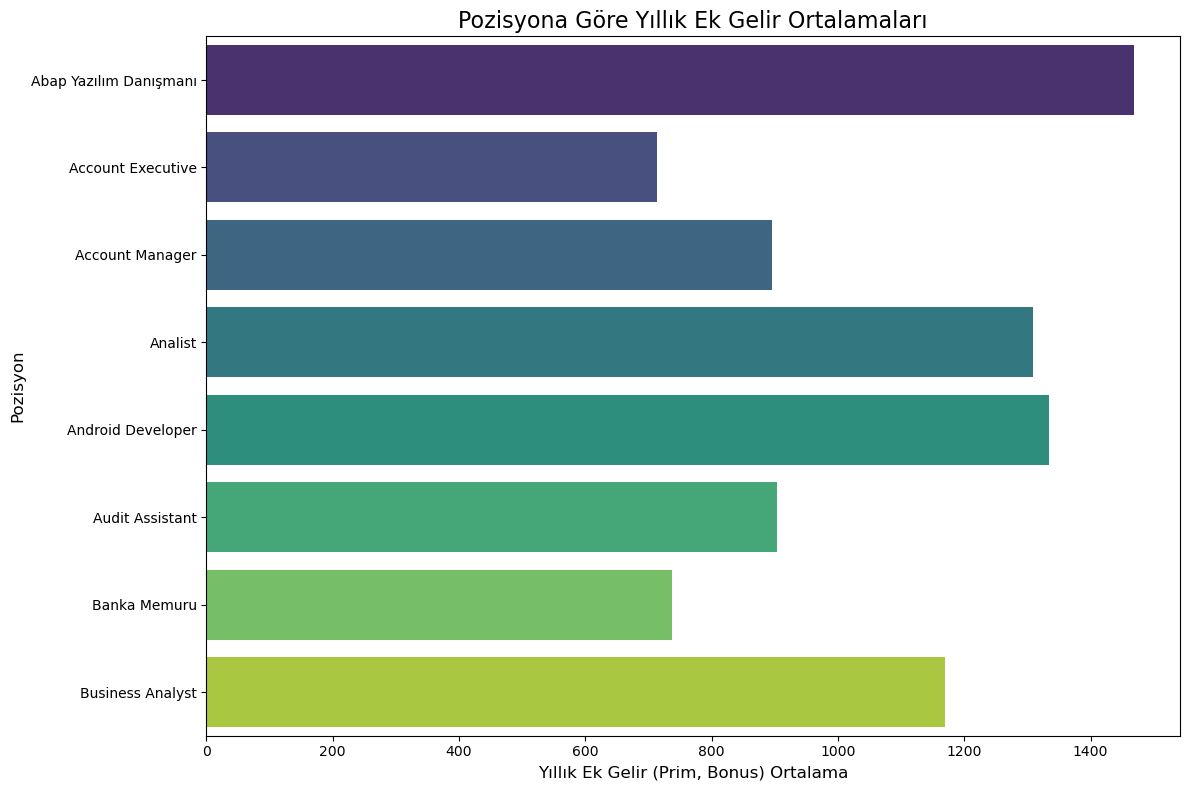

In [17]:


# Pozisyonlar ve ek gelir aralıkları
pozisyonlar = [
    'Abap Yazılım Danışmanı', 'Account Executive', 'Account Manager', 'Analist',
    'Android Developer', 'Audit Assistant', 'Banka Memuru', 'Business Analyst'
]

# Yıllık ek gelir aralıkları (örnek olarak rastgele veriler oluşturuluyor)
data_dict = {}

for pozisyon in pozisyonlar:
    # Her pozisyon için rastgele yıllık ek gelir sayıları üretelim
    gelir_sayisi = random.randint(1, 5)  # Her pozisyon için 1 ile 5 arasında gelir verisi
    gelirler = [random.randint(400, 1500) for _ in range(gelir_sayisi)]  # 400 ile 1500 TL arasında gelirler
    data_dict[pozisyon] = gelirler

# Veriyi pandas DataFrame'e dönüştürme
df = pd.DataFrame([(key, value) for key, values in data_dict.items() for value in values], columns=['Pozisyon', 'Yıllık Ek Gelir (Prim, Bonus)'])

# Yıllık ek gelirlerin ortalamasını hesaplama
average_ek_gelir = df.groupby('Pozisyon')['Yıllık Ek Gelir (Prim, Bonus)'].mean().reset_index()

# Görselleştirme
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.barplot(x='Yıllık Ek Gelir (Prim, Bonus)', y='Pozisyon', data=average_ek_gelir, palette='viridis')

# Başlık ve etiketler
plt.title('Pozisyona Göre Yıllık Ek Gelir Ortalamaları', fontsize=16)
plt.xlabel('Yıllık Ek Gelir (Prim, Bonus) Ortalama', fontsize=12)
plt.ylabel('Pozisyon', fontsize=12)

plt.tight_layout()
plt.show()


SEKTÖRE GÖRE ÇALIŞMA ŞEKLİ DAĞILIMI

In [18]:
data[data.columns[7]].value_counts()

Çalıştığınız Sektor? (Otomotiv, Bankacilik, Saglik vs)
Bilgi Teknolojileri ve Yazılım    282
Diğer                             244
Mühendislik                       115
Finans ve Muhasebe                102
Sağlık ve Tıp                     100
Perakende ve E-tıcaret             88
Üretim                             87
Eğitim                             85
Otomotiv                           80
Dijital Medya ve Eğlence           76
Tekstil ve Hazır Giyim             69
İnşaat                             61
Gıda ve İçecek                     59
Telekomünikasyon                   33
Turizm ve Konaklama                27
Çevre ve Enerji                    27
Havacılık                          25
Dağıtım ve Toptan Tıcaret          13
Name: count, dtype: int64

In [19]:
data[data.columns[4]].value_counts()

Çalışma şekliniz nedir?
Ofiste     897
Hybrid     413
Uzaktan    263
Name: count, dtype: int64

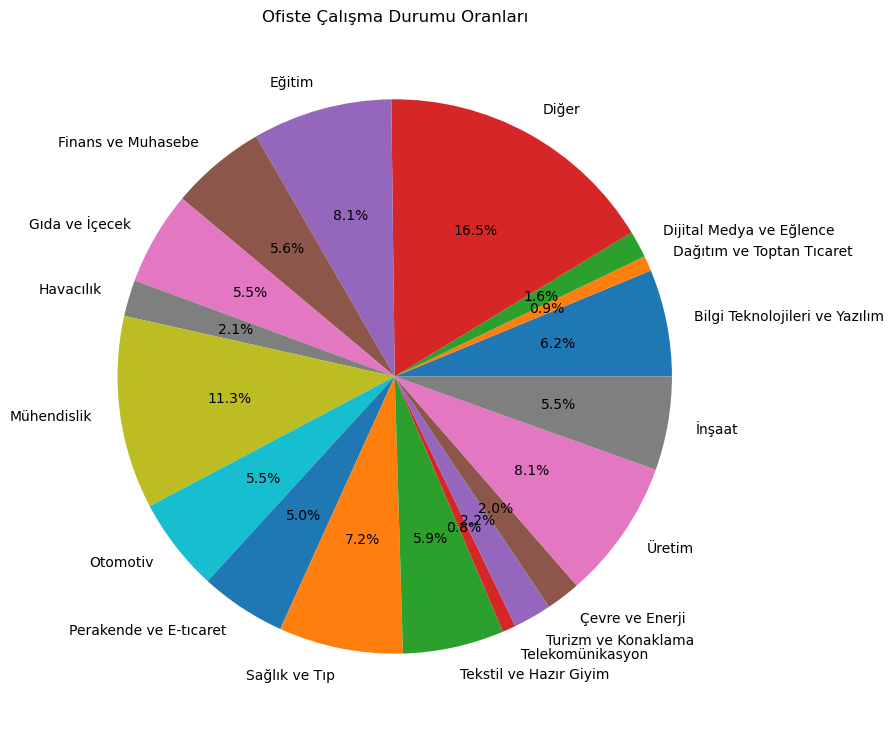

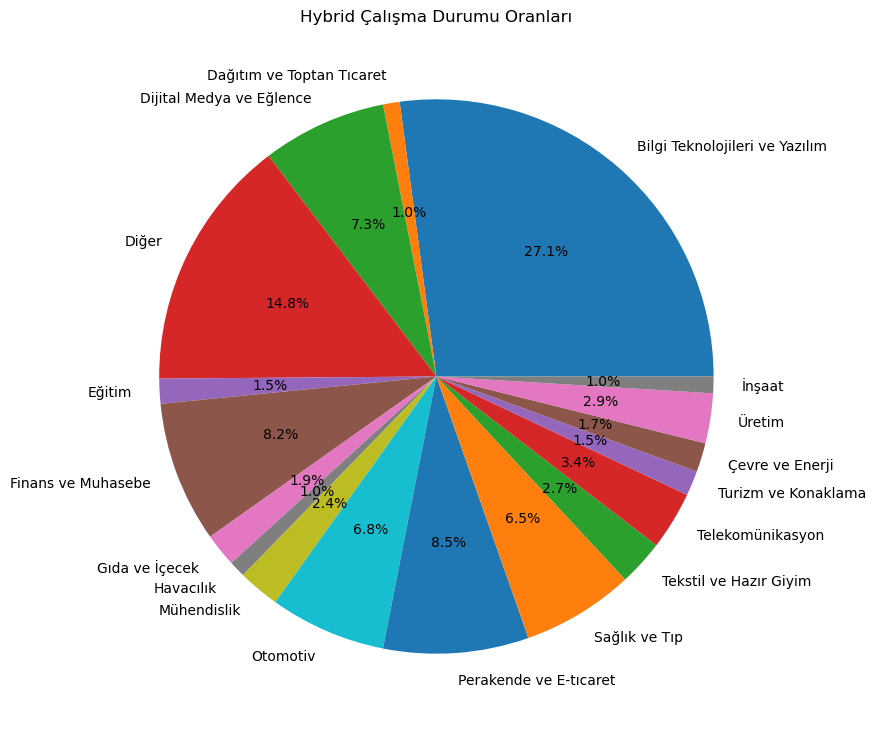

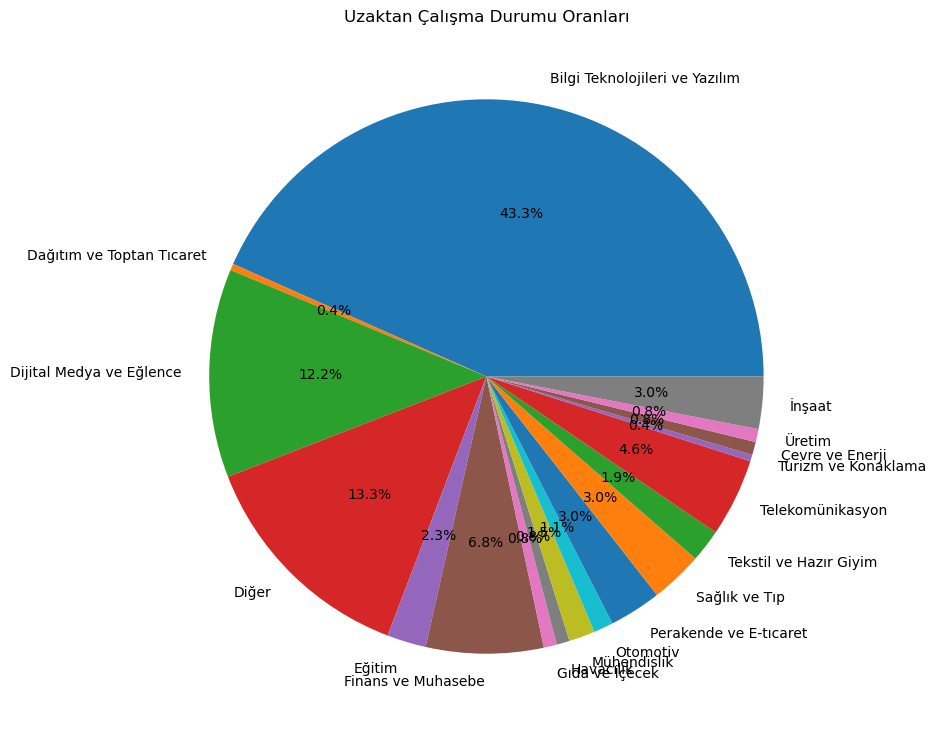

In [20]:

gender_group = data.groupby(data.columns[4])['Çalıştığınız Sektor? (Otomotiv, Bankacilik, Saglik vs)'].value_counts(normalize=True).unstack()

gender_group.loc['Ofiste'].plot(kind='pie', autopct='%1.1f%%', figsize=(9, 9))
plt.title('Ofiste Çalışma Durumu Oranları')
plt.ylabel('')
plt.show()

gender_group.loc['Hybrid'].plot(kind='pie', autopct='%1.1f%%', figsize=(9, 9))
plt.title('Hybrid Çalışma Durumu Oranları')
plt.ylabel('')
plt.show()

gender_group.loc['Uzaktan'].plot(kind='pie', autopct='%1.1f%%', figsize=(9, 9))
plt.title('Uzaktan Çalışma Durumu Oranları')
plt.ylabel('')
plt.show()


CİNSİYETE VE ÇALIŞMA ŞEKLİNE GÖRE MAAŞ ANALİZİ

In [21]:
data[data.columns[10]].value_counts()

Aylık Ortalama Net Maaşınız? (Turk Lirasi)
21.000-30.000 TL      455
31.000-40.000 TL      335
41.000-50.000 TL      242
10.000-20.000 TL      195
51.000-60.000 TL      143
61.000-70.000 TL       68
71.000-80.000 TL       53
81.000-90.000 TL       29
120.000 TL ve üstü     23
91.000-100.000 TL      16
101.000-120.000 TL     14
Name: count, dtype: int64

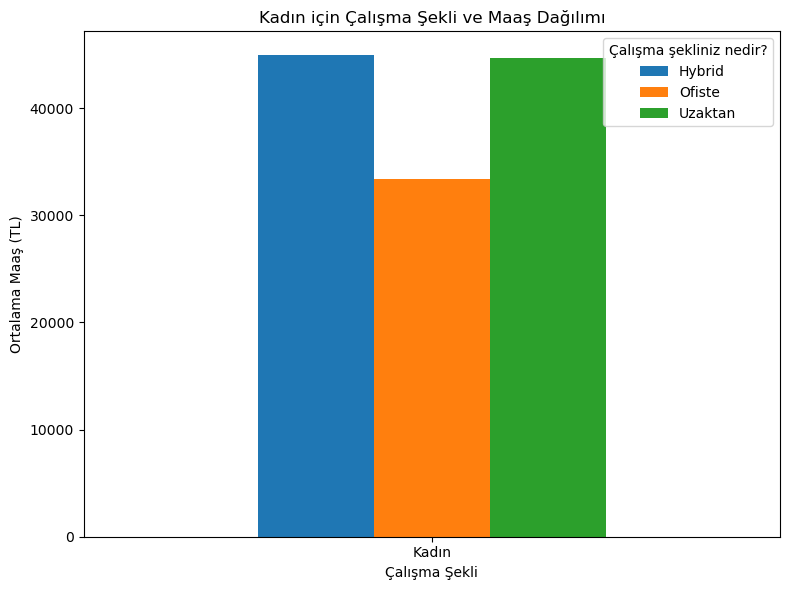

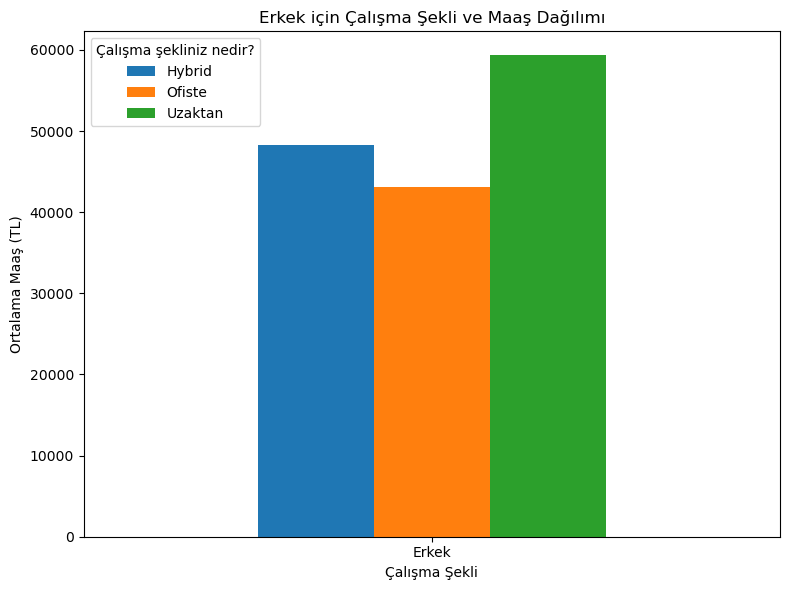

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Maaş aralıklarının ortalamasını hesaplama fonksiyonu
def maas_aralik_ortalama(maas_araligi):
    if isinstance(maas_araligi, str):  # Eğer veri string türündeyse
        # "TL" ve noktaları kaldırıyoruz
        maas_araligi = maas_araligi.replace(' TL', '').replace('.', '')
        
        # "ve üstü" içeren ifadeleri doğrudan belirli bir değere dönüştürme
        if 've üstü' in maas_araligi:
            return int(maas_araligi.split()[0])  # Sadece sayı kısmını alıyoruz
        # Eğer değer bir aralık içeriyorsa ortalama al
        elif '-' in maas_araligi:
            alt, ust = maas_araligi.split('-')
            alt = int(alt)
            ust = int(ust)
            return (alt + ust) // 2  # Ortalamayı tam sayı olarak alıyoruz
    elif isinstance(maas_araligi, (int, float)):  # Eğer veri zaten sayısal ise
        return maas_araligi  # Sayısal değeri olduğu gibi geri döneriz
    return None  # Diğer durumlar için None döneriz

# Cinsiyet sütunundaki boşlukları temizleyelim ve 'belirtmek istemiyorum' olanları çıkaralım
data['Cinsiyet'] = data['Cinsiyet'].str.strip()  # Boşlukları temizler
data = data[data['Cinsiyet'] != 'Belirtmek Istemiyorum']  # 'belirtmek istemiyorum' kategorisini çıkarır

# Maas sütunundaki her değere ortalama hesaplayan fonksiyonu uygulama
data[data.columns[10]] = data[data.columns[10]].apply(maas_aralik_ortalama)

# Her cinsiyet için sütun grafiği oluşturma
for cinsiyet in data['Cinsiyet'].unique():
    # Cinsiyete göre filtreleme
    cinsiyet_df = data[data['Cinsiyet'] == cinsiyet]

    # Cinsiyet ve çalışma şekline göre maaş ortalamasını hesaplama
    grouped_df = cinsiyet_df.groupby(['Cinsiyet', data.columns[4]])[data.columns[10]].mean().unstack()

    # Grafiği çizme
    fig, ax = plt.subplots(figsize=(8, 6))

    # Sütun grafiğini çizme
    grouped_df.plot(kind='bar', ax=ax, legend=True)

    ax.set_title(f"{cinsiyet} için Çalışma Şekli ve Maaş Dağılımı")
    ax.set_xlabel("Çalışma Şekli")
    ax.set_ylabel("Ortalama Maaş (TL)")

    plt.xticks(rotation=0)  # X eksenindeki etiketleri düz tut
    plt.tight_layout()
    plt.show()